# Image Classification

## Importing dependencies

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


## Loading the model

In [4]:
model = tf.keras.applications.MobileNetV2()

In [5]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [165]:
INPUT_IMAGE_SIZE = pretrained_model.get_input_shape_at(0)[1]
INPUT_IMAGE_SIZE

224

In [166]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
)
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [167]:
imagenet_labels.shape

(1001,)

In [168]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [169]:
test_image_path = './images/06.jpg'
test_image = tf.keras.preprocessing.image.load_img(
    test_image_path,
    target_size=[INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE]
)

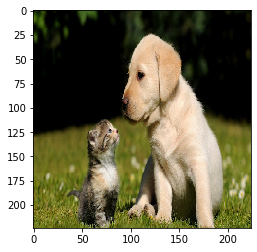

In [170]:
plt.imshow(test_image)

In [171]:
test_input = tf.keras.preprocessing.image.img_to_array(test_image)

In [172]:
test_input.shape

(224, 224, 3)

In [173]:
test_input

array([[[ 18.,  40.,   2.],
        [ 13.,  34.,   1.],
        [ 17.,  36.,   4.],
        ...,
        [ 10.,  12.,   1.],
        [ 10.,  11.,   6.],
        [  9.,  11.,   0.]],

       [[ 20.,  46.,   0.],
        [ 18.,  43.,   1.],
        [ 22.,  45.,   3.],
        ...,
        [ 11.,  11.,   0.],
        [  8.,   9.,   1.],
        [  6.,   7.,   1.]],

       [[ 27.,  56.,   0.],
        [ 26.,  55.,   1.],
        [ 27.,  54.,   3.],
        ...,
        [ 15.,  16.,   0.],
        [ 13.,  14.,   0.],
        [  2.,   3.,   0.]],

       ...,

       [[130., 140.,  53.],
        [120., 130.,  34.],
        [ 91., 107.,   9.],
        ...,
        [108., 119.,  23.],
        [112., 122.,  33.],
        [ 88., 101.,  11.]],

       [[115., 126.,  32.],
        [118., 126.,  27.],
        [108., 122.,  24.],
        ...,
        [136., 147.,  51.],
        [ 92., 106.,  18.],
        [ 86., 100.,  13.]],

       [[110., 125.,  24.],
        [123., 129.,  29.],
        [116., 1

In [174]:
test_input_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(
    test_input[tf.newaxis, ...]
)

In [175]:
test_input_preprocessed.shape

(1, 224, 224, 3)

In [176]:
test_input_preprocessed

array([[[[-0.85882354, -0.6862745 , -0.9843137 ],
         [-0.8980392 , -0.73333335, -0.99215686],
         [-0.8666667 , -0.7176471 , -0.96862745],
         ...,
         [-0.92156863, -0.90588236, -0.99215686],
         [-0.92156863, -0.9137255 , -0.9529412 ],
         [-0.92941177, -0.9137255 , -1.        ]],

        [[-0.84313726, -0.6392157 , -1.        ],
         [-0.85882354, -0.6627451 , -0.99215686],
         [-0.827451  , -0.64705884, -0.9764706 ],
         ...,
         [-0.9137255 , -0.9137255 , -1.        ],
         [-0.9372549 , -0.92941177, -0.99215686],
         [-0.9529412 , -0.94509804, -0.99215686]],

        [[-0.7882353 , -0.56078434, -1.        ],
         [-0.79607844, -0.5686275 , -0.99215686],
         [-0.7882353 , -0.5764706 , -0.9764706 ],
         ...,
         [-0.88235295, -0.8745098 , -1.        ],
         [-0.8980392 , -0.8901961 , -1.        ],
         [-0.9843137 , -0.9764706 , -1.        ]],

        ...,

        [[ 0.0196079 ,  0.09803927, -0

In [177]:
result = pretrained_model(test_input_preprocessed)

In [178]:
result.shape

TensorShape([1, 1000])

In [179]:
result

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[5.12272352e-04, 6.54372969e-04, 4.08987944e-05, 6.14919336e-05,
        1.05509214e-04, 3.17539889e-05, 3.93763112e-05, 3.10408825e-04,
        3.81864200e-04, 5.53858008e-05, 1.75941444e-04, 2.54172715e-04,
        2.27617318e-04, 1.84066535e-04, 1.54869020e-04, 2.88111005e-05,
        6.01531829e-05, 3.74662959e-05, 3.18731501e-04, 2.24088857e-04,
        9.96482486e-05, 2.63932561e-05, 1.74214612e-04, 7.50062987e-04,
        1.20166296e-04, 4.33835667e-04, 7.04180682e-04, 2.17077788e-04,
        2.06621058e-04, 1.41172248e-04, 6.31732401e-05, 1.19576303e-04,
        5.02175099e-05, 4.35683578e-05, 8.91544987e-05, 5.52469282e-04,
        1.06506734e-04, 1.32195040e-04, 6.30956274e-05, 1.28802014e-04,
        1.43457626e-04, 1.14172777e-04, 5.68263989e-04, 6.70335721e-05,
        2.11653183e-04, 6.78570577e-05, 2.42561393e-04, 3.07031441e-04,
        3.40196246e-04, 8.61160806e-05, 3.01668217e-04, 1.71983251e-04,
        9.593

In [180]:
sorted_result = np.argsort(result)

In [181]:
sorted_result.shape

(1, 1000)

In [182]:
sorted_result

array([[172, 585, 171, 374, 226, 287, 481, 903, 587, 187, 353, 746, 283,
        589, 242, 365, 686, 828, 616, 743, 848, 337, 455,  21, 142, 150,
        980,  15, 143, 612, 840, 962, 906, 941,   5, 730, 154, 352, 196,
        528, 195, 339, 751, 740, 550, 569, 107, 354,  17, 721, 817, 344,
        237, 390,   6, 784, 591, 413, 945,   2, 714, 499, 261, 400, 692,
        747,  33, 869, 720, 259, 707, 395, 988, 629, 355, 960, 233, 976,
        886, 558,  32, 477, 313, 614, 439, 754,  81, 802, 125, 933, 728,
        503, 485, 463,  54, 506, 684,   9, 648, 379, 861, 801, 917, 956,
         55, 157, 689, 733, 722, 350, 643, 412, 546, 749, 845, 442, 447,
         67, 584, 973, 695, 599, 366, 690, 118, 647, 514, 763, 521,  16,
        305, 336, 588, 213, 141, 827,  60,   3, 655, 424, 711, 138, 446,
        813,  38,  30, 679, 989, 425, 326, 158, 106, 918, 718, 387, 642,
         95, 654, 535, 469,  79, 474, 501, 925, 592,  43, 460, 136, 252,
        905, 286,  45,  58,  80, 524, 822, 217, 131

In [183]:
sorted_reshaped_result = sorted_result[0,::-1]

In [184]:
sorted_reshaped_result.shape

(1000,)

In [185]:
sorted_reshaped_result

array([208, 222, 207, 209, 216, 257, 188, 227, 211, 244, 361, 206, 273,
       181, 159, 248, 215, 238, 341, 434, 174, 529, 205, 212, 249, 256,
       250, 934, 175, 475, 167, 999, 240, 234, 852, 464, 260, 270, 190,
       376, 808, 700, 298, 388, 231, 168, 162, 348, 842, 228, 965, 282,
       443, 428, 264, 241,  23, 272, 468, 229, 597, 239, 178, 191, 293,
        26, 232, 235, 602, 634, 832, 964, 170, 975, 539, 173, 296, 520,
       994, 553, 164,   1, 527, 778, 682, 515, 269,  99, 703, 186, 189,
       537, 285,  94, 931, 619,  42, 410, 325, 565,  35, 831, 299, 517,
       324, 757, 220, 255, 356, 416, 145, 177, 183,   0, 818, 151, 937,
       358, 856, 859, 680, 267,  71, 693, 397, 942, 972, 661, 549, 278,
       214, 166, 291, 637,  72, 375, 995, 247, 456, 844, 793, 169, 675,
       893,  25, 113, 780, 562, 991, 144, 620, 731, 362, 516, 769, 891,
       472, 359, 825, 805, 182, 768, 672,  89, 914, 835, 536, 100,   8,
       863, 878, 660, 454, 483, 526, 421, 552, 929, 771, 638, 12

In [186]:
decoded = imagenet_labels[sorted_reshaped_result + 1][:5]

In [187]:
decoded.shape

(5,)

In [188]:
decoded

array(['Labrador retriever', 'kuvasz', 'golden retriever',
       'Chesapeake Bay retriever', 'clumber'], dtype='<U30')